## Final Project Submission

Please fill out:
* Student name: Terry Thompson
* Student pace: self paced
* Scheduled project review date/time: TBD
* Instructor name: Matt Carr
* Blog post URL:


# Analysis for Microsoft Movies

#### Here we will look at an analysis regarding what is the best strategy for Microsoft Movies.  The analysis will take into account which genres are the most profitable, which directors would be ideal, and the best times to release our new block busters!

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import sqlite3
import pymongo
import json
import csv

In [3]:
#Read a sample of the table.  This information is taken from Box Office Mojo.
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv', dtype=str)
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### To find out what the gross sum is, I need to look at the information, see if there are missing values, and fill them in.  This will give us a better picture when we look at the highest grossing movies.

In [4]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3359 non-null   object
 3   foreign_gross   2037 non-null   object
 4   year            3387 non-null   object
dtypes: object(5)
memory usage: 132.4+ KB


In [5]:
# Fill in NaN values
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(0)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(0)

In [6]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   object
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   object
dtypes: object(5)
memory usage: 132.4+ KB


In [7]:
#Here I found an error which I thought may just be one problem, so I fixed it.
movie_gross_df.iloc[1872]

title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                     936700000.0
foreign_gross                          1,131.6
year                                      2015
Name: 1872, dtype: object

In [8]:
#remove commas from the dataframe.  Code adapted from jezrael, from https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
movie_gross_df.replace(',','', regex=True, inplace=True)

In [9]:
#Change dtype from Python object to integers
movie_gross_df['domestic_gross'] = pd.to_numeric(movie_gross_df['domestic_gross'])
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].astype(np.int64)
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'])
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(np.int64)

In [10]:
#Calculate total gross of the movies.
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']

In [11]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200,0,2018,6200
3383,Edward II (2018 re-release),FM,4800,0,2018,4800
3384,El Pacto,Sony,2500,0,2018,2500
3385,The Swan,Synergetic,2400,0,2018,2400


In [12]:
top_gross_df = movie_gross_df.sort_values(by='total_gross', ascending=False)

In [13]:
top_gross_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
1875,Avengers: Age of Ultron,BV,459000000,946400000,2015,1405400000
3080,Black Panther,BV,700100000,646900000,2018,1347000000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,2011,1341500000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,2017,1332600000
3081,Jurassic World: Fallen Kingdom,Uni.,417700000,891800000,2018,1309500000
1127,Frozen,BV,400700000,875700000,2013,1276400000
2759,Beauty and the Beast (2017),BV,504000000,759500000,2017,1263500000
3082,Incredibles 2,BV,608600000,634200000,2018,1242800000
1128,Iron Man 3,BV,409000000,805800000,2013,1214800000


##### The above information was cleaned and prepared so I could compare it to the next data set.  The above information comes from Box Office Mojo.  The next set comes from The Numbers, which is a website (the-numbers.com)

In [14]:
# Importing csv file from The Numbers
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv', dtype=str)
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
#The next few cells are data cleaning.
movie_budget_df.drop(columns = ['id'], inplace = True)

In [16]:
movie_budget_df['datetime_format'] = pd.to_datetime(movie_budget_df['release_date'])

In [17]:
movie_budget_df.sort_values('datetime_format', ascending = False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,datetime_format
194,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,2020-12-31
1205,"Dec 31, 2020",Hannibal the Conqueror,"$50,000,000",$0,$0,2020-12-31
535,"Feb 21, 2020",Call of the Wild,"$82,000,000",$0,$0,2020-02-21
480,"Dec 31, 2019",Army of the Dead,"$90,000,000",$0,$0,2019-12-31
3515,"Dec 31, 2019",Eli,"$11,000,000",$0,$0,2019-12-31
...,...,...,...,...,...,...
5606,"Nov 19, 1925",The Big Parade,"$245,000","$11,000,000","$22,000,000",1925-11-19
5683,"Sep 17, 1920",Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000",1920-09-17
5614,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",1916-12-24
5523,"Sep 5, 1916",Intolerance,"$385,907",$0,$0,1916-09-05


In [18]:
# Removing commas from the dataframe.  Code adapted from jezrael, from https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
movie_budget_df.replace(',','', regex=True, inplace=True)

In [19]:
# Removing $ from specific columns.
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean: movie_budget_df[col] = movie_budget_df[col].map(lambda x: x.replace('$', ''))

In [20]:
# Changing dtype('0') columns to workable integers.
movie_budget_df['production_budget'] = pd.to_numeric(movie_budget_df['production_budget'])
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].astype(np.int64)
movie_budget_df['domestic_gross'] = pd.to_numeric(movie_budget_df['domestic_gross'])
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype(np.int64)
movie_budget_df['worldwide_gross'] = pd.to_numeric(movie_budget_df['worldwide_gross'])
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype(np.int64)

In [21]:
# Finding profitability in each movie.
movie_budget_df['total_gross'] = movie_budget_df['domestic_gross'] + movie_budget_df['worldwide_gross']
movie_budget_df['total_profit'] = movie_budget_df['total_gross'] - movie_budget_df['production_budget']

In [22]:
# I have added a column "datetime_format".  This is a copy of "release_date", and I can manipulate it much easier.
movie_budget_df.drop(columns = ['release_date'], inplace = True)

In [23]:
top_profit_df = movie_budget_df.sort_values(by='total_profit', ascending=False)
top_profit_df.head(20)

,movie,production_budget,domestic_gross,worldwide_gross,datetime_format,total_gross,total_profit
0,Avatar,425000000,760507625,2776345279,2009-12-18,3536852904,3111852904
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015-12-18,2989973445,2683973445
42,Titanic,200000000,659363944,2208208395,1997-12-19,2867572339,2667572339
6,Avengers: Infinity War,300000000,678815482,2048134200,2018-04-27,2726949682,2426949682
33,Jurassic World,215000000,652270625,1648854864,2015-06-12,2301125489,2086125489
26,The Avengers,225000000,623279547,1517935897,2012-05-04,2141215444,1916215444
41,Black Panther,200000000,700059566,1348258224,2018-02-16,2048317790,1848317790
66,Furious 7,190000000,353007020,1518722794,2015-04-03,1871729814,1681729814
43,Incredibles 2,200000000,608581744,1242520711,2018-06-15,1851102455,1651102455
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15,1936903129,1619903129


#### The information from The Numbers is slightly different from Box Office Mojo.  While many of the top grossing movies are on both lists, the information from The Numbers is more comprehensive.

###### I will need to create a more comprehensive file to complete my research.  Below are lists taken from IMDB.  They are parts of the whole, so I will have to assemble a dataframe that contains the items I am looking for: directors, release dates, and genres. I will then proceed to create a new dataset that merges the IMDB dataframe with the dataset created from The Numbers.  This will allow me to organize the information I am looking for by profitability.

In [24]:
movie_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv', dtype=str)
movie_crew_df

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [25]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.principals.csv', dtype = str)
imdb_title_df

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [26]:
# Join tables.  This will be a rinse and repeat step in cleaning the data and merging the table to make sense of the information.
crew_principles_df= pd.merge(imdb_title_df, movie_crew_df, on='tconst', how='outer')
crew_principles_df 


,tconst,ordering,nconst,category,job,characters,directors,writers
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",nm0398271,nm0398271
1,tt0111414,2,nm0398271,director,NaN,NaN,nm0398271,nm0398271
2,tt0111414,3,nm3739909,producer,producer,NaN,nm0398271,nm0398271
3,tt0323808,10,nm0059247,editor,NaN,NaN,nm0362736,nm0362736
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",nm0362736,nm0362736
...,...,...,...,...,...,...,...,...
1030871,tt7659080,NaN,NaN,NaN,NaN,NaN,nm6474441,NaN
1030872,tt7763158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030873,tt7980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030874,tt8352852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# The information in these columns are unnecessary.  For cleanliness sake, we are dropping them.
columns = ['characters', 'writers', 'job', 'ordering']
crew_principles_df.drop(columns, inplace=True, axis=1)

In [28]:
crew_principles_df

,tconst,nconst,category,directors
0,tt0111414,nm0246005,actor,nm0398271
1,tt0111414,nm0398271,director,nm0398271
2,tt0111414,nm3739909,producer,nm0398271
3,tt0323808,nm0059247,editor,nm0362736
4,tt0323808,nm3579312,actress,nm0362736
...,...,...,...,...
1030871,tt7659080,NaN,NaN,nm6474441
1030872,tt7763158,NaN,NaN,NaN
1030873,tt7980000,NaN,NaN,NaN
1030874,tt8352852,NaN,NaN,NaN


In [29]:
imdb_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv', dtype = str)
imdb_basics_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [30]:
columns = ['birth_year', 'death_year', 'primary_profession', 'known_for_titles']
imdb_basics_df.drop(columns, inplace=True, axis=1)

In [31]:
people_join_df= pd.merge(imdb_basics_df, crew_principles_df, on='nconst', how='outer')
people_join_df 

,nconst,primary_name,tconst,category,directors
0,nm0061671,Mary Ellen Bauder,tt2398241,producer,nm0038432
1,nm0061865,Joseph Bauer,tt0433397,composer,nm0647487
2,nm0061865,Joseph Bauer,tt1681372,composer,nm0996586
3,nm0061865,Joseph Bauer,tt2387710,composer,nm0928832
4,nm0061865,Joseph Bauer,tt2281215,composer,nm0928832
...,...,...,...,...,...
1033229,NaN,NaN,tt7659080,NaN,nm6474441
1033230,NaN,NaN,tt7763158,NaN,NaN
1033231,NaN,NaN,tt7980000,NaN,NaN
1033232,NaN,NaN,tt8352852,NaN,NaN


In [32]:
movie_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv', dtype=str)
movie_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116,NaN


In [33]:
columns = ['original_title', 'start_year', 'runtime_minutes']
movie_basics_df.drop(columns, inplace=True, axis=1)

In [34]:
titlenpeople_join_df= pd.merge(people_join_df, movie_basics_df, on='tconst', how='outer')
titlenpeople_join_df 

,nconst,primary_name,tconst,category,directors,primary_title,genres
0,nm0061671,Mary Ellen Bauder,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
1,nm0038432,Kelly Asbury,tt2398241,director,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
2,nm0449549,Jordan Kerner,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
3,nm0962596,Pamela Ribon,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
4,nm0678963,Peyo,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...
1033229,NaN,NaN,tt7659080,NaN,nm6474441,Khakee,NaN
1033230,NaN,NaN,tt7763158,NaN,NaN,Chawetaw,NaN
1033231,NaN,NaN,tt7980000,NaN,NaN,Agents Particuliers,Comedy
1033232,NaN,NaN,tt8352852,NaN,NaN,Rite of Spring,NaN


In [35]:
movie_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv', dtype=str)
movie_akas_df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0


In [36]:
# Making reference numbers uniform across the dataframe.
movie_akas_df = movie_akas_df.rename({'title_id': 'tconst'}, axis=1)

In [37]:
movie_akas_df

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0


In [38]:
aka_slice_df = movie_akas_df.loc[movie_akas_df['region'] == "XWW"]
aka_slice_df

,tconst,ordering,title,region,language,types,attributes,is_original_title
14,tt0369610,23,Jurassic World 3D,XWW,NaN,NaN,3-D version,0
87,tt10027708,2,Miguelito,XWW,en,imdbDisplay,NaN,0
142,tt10225354,3,Returning Home,XWW,en,alternative,NaN,0
144,tt10225420,2,The Universe in Which I Loved You,XWW,en,imdbDisplay,NaN,0
148,tt10308634,3,Young Clients,XWW,en,alternative,NaN,0
...,...,...,...,...,...,...,...,...
331679,tt9644084,3,The Breath,XWW,en,alternative,NaN,0
331680,tt9654246,1,The Wild Man of the North,XWW,en,imdbDisplay,NaN,0
331683,tt9657946,1,Homing,XWW,en,imdbDisplay,NaN,0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0


In [39]:
columns = ['ordering', 'language', 'types', 'attributes', 'is_original_title', 'region']
aka_slice_df.drop(columns, inplace=True, axis=1)

C:\Users\thomp\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
name_em_df = pd.merge(titlenpeople_join_df, aka_slice_df, on='tconst', how='outer')
name_em_df 

,nconst,primary_name,tconst,category,directors,primary_title,genres,title
0,nm0061671,Mary Ellen Bauder,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",NaN
1,nm0038432,Kelly Asbury,tt2398241,director,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",NaN
2,nm0449549,Jordan Kerner,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",NaN
3,nm0962596,Pamela Ribon,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",NaN
4,nm0678963,Peyo,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",NaN
...,...,...,...,...,...,...,...,...
1048429,NaN,NaN,tt7659080,NaN,nm6474441,Khakee,NaN,NaN
1048430,NaN,NaN,tt7763158,NaN,NaN,Chawetaw,NaN,NaN
1048431,NaN,NaN,tt7980000,NaN,NaN,Agents Particuliers,Comedy,NaN
1048432,NaN,NaN,tt8352852,NaN,NaN,Rite of Spring,NaN,NaN


In [41]:
columns = ['title']
name_em_df.drop(columns, inplace=True, axis=1)

In [42]:
movie_ratings1_df = pd.read_csv('zippedData/imdb.title.ratings.csv', dtype=str)
movie_ratings1_df

,tconst,averagerating,numvotes
0,tt10356526,8.3000,31
1,tt10384606,8.9000,559
2,tt1042974,6.4000,20
3,tt1043726,4.2000,50352
4,tt1060240,6.5000,21
...,...,...,...
73851,tt9805820,8.1000,25
73852,tt9844256,7.5000,24
73853,tt9851050,4.7000,14
73854,tt9886934,7.0000,5


In [43]:
columns = ['numvotes']
movie_ratings1_df.drop(columns, inplace=True, axis=1)

In [44]:
movie_ratings1_df

,tconst,averagerating
0,tt10356526,8.3000
1,tt10384606,8.9000
2,tt1042974,6.4000
3,tt1043726,4.2000
4,tt1060240,6.5000
...,...,...
73851,tt9805820,8.1000
73852,tt9844256,7.5000
73853,tt9851050,4.7000
73854,tt9886934,7.0000


In [45]:
# At this point I have assembled and cleaned most of the data given from the IMDB files. Merging on 'tconst'.
imdb_df = pd.merge(name_em_df, movie_ratings1_df, on='tconst', how='outer')
imdb_df 

,nconst,primary_name,tconst,category,directors,primary_title,genres,averagerating
0,nm0061671,Mary Ellen Bauder,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",6.0000
1,nm0038432,Kelly Asbury,tt2398241,director,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",6.0000
2,nm0449549,Jordan Kerner,tt2398241,producer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",6.0000
3,nm0962596,Pamela Ribon,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",6.0000
4,nm0678963,Peyo,tt2398241,writer,nm0038432,Smurfs: The Lost Village,"Adventure,Animation,Comedy",6.0000
...,...,...,...,...,...,...,...,...
1048429,NaN,NaN,tt7659080,NaN,nm6474441,Khakee,NaN,NaN
1048430,NaN,NaN,tt7763158,NaN,NaN,Chawetaw,NaN,NaN
1048431,NaN,NaN,tt7980000,NaN,NaN,Agents Particuliers,Comedy,NaN
1048432,NaN,NaN,tt8352852,NaN,NaN,Rite of Spring,NaN,NaN


In [46]:
# I no longer need "nconst" and "tconst".  To keep the data set clean, I am removing them.
columns = ['tconst', 'nconst', 'directors', 'averagerating']
imdb_df.drop(columns, inplace=True, axis=1)

In [47]:
imdb_df

,primary_name,category,primary_title,genres
0,Mary Ellen Bauder,producer,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
1,Kelly Asbury,director,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
2,Jordan Kerner,producer,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
3,Pamela Ribon,writer,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
4,Peyo,writer,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
...,...,...,...,...
1048429,NaN,NaN,Khakee,NaN
1048430,NaN,NaN,Chawetaw,NaN
1048431,NaN,NaN,Agents Particuliers,Comedy
1048432,NaN,NaN,Rite of Spring,NaN


###### I have merged all of the information from IMDB into one dataframe.  I will further clean it, as there are multiples that need to be removed.

In [48]:
cleaning_df = imdb_df.loc[imdb_df['category'] == "director"]

In [49]:
cleaning_df.drop_duplicates(keep=False, inplace=False)
cleaning_df


,primary_name,category,primary_title,genres
1,Kelly Asbury,director,Smurfs: The Lost Village,"Adventure,Animation,Comedy"
11,Christopher Olness,director,Satin,"Comedy,Drama,Music"
32,Ethan Wiley,director,Journey to the Forbidden Valley,"Action,Adventure,Family"
42,Ethan Wiley,director,Elf-Man,"Comedy,Family,Fantasy"
53,John Asher,director,Somebody Marry Me,"Comedy,Romance"
...,...,...,...,...
1045739,Klaus Erik Okstad,director,Det Afghanske Marerittet,Documentary
1045740,Reza Aghaei,director,Glasses,"Drama,Family"
1045741,Efrain Sosa,director,Finding the Night of the Dead,Documentary
1045742,Bastien Larue,director,Les officiants,Documentary


###### Here we have a cleaned set of data, organized by director.  Our next step will be to slice the profitability data and integrate it into the IMDB movie data we have cleaned and assembled.  This will allow us to graph the results several different ways using the same dataframe.

In [50]:
sliced_profit_df = movie_budget_df
columns = ['production_budget', 'domestic_gross', 'worldwide_gross', 'total_gross']
sliced_profit_df.drop(columns, inplace=True, axis=1)
sliced_profit_df

,movie,datetime_format,total_profit
0,Avatar,2009-12-18,3111852904
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,876127750
2,Dark Phoenix,2019-06-07,-157475300
3,Avengers: Age of Ultron,2015-05-01,1531419831
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,1619903129
...,...,...,...
5777,Red 11,2018-12-31,-7000
5778,Following,1999-04-02,282977
5779,Return to the Land of Wonders,2005-07-13,-2324
5780,A Plague So Pleasant,2015-09-29,-1400


In [51]:
sliced_profit_df = sliced_profit_df.rename(columns={'movie': 'primary_title'})

In [52]:
movies_df = pd.merge(sliced_profit_df, cleaning_df, on='primary_title', how='outer')
movies_df 

,primary_title,datetime_format,total_profit,primary_name,category,genres
0,Avatar,2009-12-18,3.111853e+09,Atsushi Wada,director,Horror
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,8.761278e+08,Rob Marshall,director,"Action,Adventure,Fantasy"
2,Dark Phoenix,2019-06-07,-1.574753e+08,Simon Kinberg,director,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,2015-05-01,1.531420e+09,Joss Whedon,director,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,1.619903e+09,NaN,NaN,NaN
...,...,...,...,...,...,...
151932,Sedimentary Structures,NaT,NaN,Jason Oppliger,director,Documentary
151933,Det Afghanske Marerittet,NaT,NaN,Klaus Erik Okstad,director,Documentary
151934,Glasses,NaT,NaN,Reza Aghaei,director,"Drama,Family"
151935,Finding the Night of the Dead,NaT,NaN,Efrain Sosa,director,Documentary


In [53]:
# The data set contains multiple entries of the movies, so I have removed the movie duplicates, keeping only the rows with directors.
movies_df.drop_duplicates(keep=False, inplace=True)
columns = ['category']
movies_df.drop(columns, inplace=True, axis=1)
movies_df.rename(columns={'primary_name': 'director'})
movies_df

,primary_title,datetime_format,total_profit,primary_name,genres
0,Avatar,2009-12-18,3.111853e+09,Atsushi Wada,Horror
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,8.761278e+08,Rob Marshall,"Action,Adventure,Fantasy"
2,Dark Phoenix,2019-06-07,-1.574753e+08,Simon Kinberg,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,2015-05-01,1.531420e+09,Joss Whedon,"Action,Adventure,Sci-Fi"
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,1.619903e+09,NaN,NaN
...,...,...,...,...,...
151932,Sedimentary Structures,NaT,NaN,Jason Oppliger,Documentary
151933,Det Afghanske Marerittet,NaT,NaN,Klaus Erik Okstad,Documentary
151934,Glasses,NaT,NaN,Reza Aghaei,"Drama,Family"
151935,Finding the Night of the Dead,NaT,NaN,Efrain Sosa,Documentary


In [54]:
movies_df = movies_df.sort_values(by='total_profit', ascending=False)
movies_df.head(60)

,primary_title,datetime_format,total_profit,primary_name,genres
0,Avatar,2009-12-18,3.111853e+09,Atsushi Wada,Horror
5,Star Wars Ep. VII: The Force Awakens,2015-12-18,2.683973e+09,NaN,NaN
59,Titanic,1997-12-19,2.667572e+09,Ravi Punj,Family
41,Jurassic World,2015-06-12,2.086125e+09,Colin Trevorrow,"Action,Adventure,Sci-Fi"
33,The Avengers,2012-05-04,1.916215e+09,Joss Whedon,"Action,Adventure,Sci-Fi"
58,Black Panther,2018-02-16,1.848318e+09,Ryan Coogler,"Action,Adventure,Sci-Fi"
95,Furious 7,2015-04-03,1.681730e+09,James Wan,"Action,Crime,Thriller"
60,Incredibles 2,2018-06-15,1.651102e+09,Brad Bird,"Action,Adventure,Animation"
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,1.619903e+09,NaN,NaN
190,Beauty and the Beast,2017-03-17,1.603214e+09,Zane Burden,"Family,Fantasy,Musical"


##### There are multiple items that do not match.  I will now fix the table.

In [55]:
# I could not find a way to fill in the NaN values properly, so I took the top 60 movies, verified director and genre, and
# replaced the values.  I apoloqize for the repetition, but it was necessary.
movies_df.at[0, 'primary_name']= 'James Cameron'
movies_df.at[0, 'genres']= 'Action,Adventure,Sci-fi'
movies_df.at[59, 'primary_name']= 'James Cameron'
movies_df.at[59, 'genres']= 'Drama, Romance'
movies_df.at[5, 'primary_name']= 'JJ Abrams'
movies_df.at[5, 'genres']= 'Action,Adventure,Sci-fi'
movies_df.at[55, 'primary_name']= 'James Cameron'
movies_df.at[55, 'genres']= 'Drama,Romance'
movies_df.at[6, 'primary_name']= 'Anthony Russo'
movies_df.at[6, 'genres']= 'Action,Adventure,Sci-fi'
movies_df.at[4, 'primary_name']= 'Rian Johnson'
movies_df.at[4, 'genres']= 'Action,Adventure,Sci-fi'
movies_df.at[415, 'primary_name']= 'David Yates'
movies_df.at[415, 'genres']= 'Adventure,Fantasy,Mystery'
movies_df.at[640, 'primary_name']= 'Peter Jackson'
movies_df.at[640, 'genres']= 'Action,Adventure,Drama'
movies_df.at[479, 'primary_name']= 'George Lucas'
movies_df.at[479, 'genres']= 'Action,Adventure,Fantasy'
movies_df.at[57, 'primary_name']= 'Gareth Edwards'
movies_df.at[57, 'genres']= 'Action,Adventure,Fantasy'
movies_df.at[1130, 'primary_name']= 'Steven Speilberg'
movies_df.at[1130, 'genres']= 'Action,Adventure,Sci-fi'
movies_df.at[98, 'primary_name']= 'Christopher Nolan'
movies_df.at[98, 'genres']= 'Action,Crime,Drama'
movies_df.at[855, 'primary_name']= 'Rob Minkoff'
movies_df.at[968, 'primary_name']= 'Conrad Vernon'
movies_df.at[968, 'genres']= 'Animation,Adventure,Comedy'
movies_df.at[31, 'primary_name']= 'Gore Verbinski'
movies_df.at[31, 'genres']= 'Action,Adventure,Fantasy'
movies_df.at[4439, 'primary_name']= 'George Lucas'
movies_df.at[4439, 'genres']= 'Action,Adventure,Fantasy'
movies_df.at[639, 'primary_name']= 'Andrew Stanton'
movies_df.at[639, 'genres']= 'Animation,Adventure,Comedy'
movies_df.at[4508, 'primary_name']= 'Steven Speilberg'
movies_df.at[4508, 'genres']= 'Adventure,Family,Sci-fi'
movies_df.at[72, 'primary_name']= 'Sam Mendes'
movies_df.at[72, 'genres']= 'Action,Adventure,Thriller'
movies_df.at[641, 'primary_name']= 'Peter Jackson'
movies_df.at[641, 'genres']= 'Action,Adventure,Drama'
movies_df.at[639, 'genres']= 'Action,Adventure,Drama'
movies_df.at[417, 'primary_name']= 'Chris Columbus'
movies_df.at[417, 'genres']= 'Adventure,Family,Fantasy'
movies_df.head(60)

,primary_title,datetime_format,total_profit,primary_name,genres
0,Avatar,2009-12-18,3.111853e+09,James Cameron,"Action,Adventure,Sci-fi"
5,Star Wars Ep. VII: The Force Awakens,2015-12-18,2.683973e+09,JJ Abrams,"Action,Adventure,Sci-fi"
59,Titanic,1997-12-19,2.667572e+09,James Cameron,"Drama, Romance"
41,Jurassic World,2015-06-12,2.086125e+09,Colin Trevorrow,"Action,Adventure,Sci-Fi"
33,The Avengers,2012-05-04,1.916215e+09,Joss Whedon,"Action,Adventure,Sci-Fi"
58,Black Panther,2018-02-16,1.848318e+09,Ryan Coogler,"Action,Adventure,Sci-Fi"
95,Furious 7,2015-04-03,1.681730e+09,James Wan,"Action,Crime,Thriller"
60,Incredibles 2,2018-06-15,1.651102e+09,Brad Bird,"Action,Adventure,Animation"
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,1.619903e+09,Rian Johnson,"Action,Adventure,Sci-fi"
190,Beauty and the Beast,2017-03-17,1.603214e+09,Zane Burden,"Family,Fantasy,Musical"


In [56]:
movies_df = movies_df.rename(columns={'primary_name': 'director'})

In [57]:
# We now have a master dataframe in which to assess the key components to making successfull movies.
movies_df

,primary_title,datetime_format,total_profit,director,genres
0,Avatar,2009-12-18,3.111853e+09,James Cameron,"Action,Adventure,Sci-fi"
5,Star Wars Ep. VII: The Force Awakens,2015-12-18,2.683973e+09,JJ Abrams,"Action,Adventure,Sci-fi"
59,Titanic,1997-12-19,2.667572e+09,James Cameron,"Drama, Romance"
41,Jurassic World,2015-06-12,2.086125e+09,Colin Trevorrow,"Action,Adventure,Sci-Fi"
33,The Avengers,2012-05-04,1.916215e+09,Joss Whedon,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
151933,Det Afghanske Marerittet,NaT,NaN,Klaus Erik Okstad,Documentary
151934,Glasses,NaT,NaN,Reza Aghaei,"Drama,Family"
151935,Finding the Night of the Dead,NaT,NaN,Efrain Sosa,Documentary
151936,Les officiants,NaT,NaN,Bastien Larue,Documentary


In [58]:
directors = movies_df.copy(deep=False)

In [59]:
columns = ['primary_title','datetime_format', 'genres']
directors.drop(columns, inplace=True, axis=1)

In [60]:
directors

,total_profit,director
0,3.111853e+09,James Cameron
5,2.683973e+09,JJ Abrams
59,2.667572e+09,James Cameron
41,2.086125e+09,Colin Trevorrow
33,1.916215e+09,Joss Whedon
...,...,...
151933,NaN,Klaus Erik Okstad
151934,NaN,Reza Aghaei
151935,NaN,Efrain Sosa
151936,NaN,Bastien Larue


In [61]:
# I got rid of rows that I was unable to discern a profit.
directors['total_profit'].fillna(0, inplace=True)
directors['director'].fillna('UNKNOWN', inplace=True)

In [62]:
directors = directors.sort_values(by='total_profit', ascending=False)
directors.head(5141)

,total_profit,director
0,3.111853e+09,James Cameron
5,2.683973e+09,JJ Abrams
59,2.667572e+09,James Cameron
41,2.086125e+09,Colin Trevorrow
33,1.916215e+09,Joss Whedon
...,...,...
103673,0.000000e+00,Doriana Paneva
103672,0.000000e+00,Niki Stanchev
103671,0.000000e+00,Deniz Akcay Katiksiz
103670,0.000000e+00,Robin Hamilton


In [63]:
directors = directors.groupby(['director']).sum()
directors = directors.sort_values(by='total_profit', ascending=False)
directors = directors.reset_index(drop=False)

In [64]:
top_directors = directors.head(21)
top_directors

,director,total_profit
0,UNKNOWN,3.103960e+11
1,James Cameron,5.899654e+09
2,Christopher Nolan,3.760863e+09
3,James Wan,3.591467e+09
4,Joss Whedon,3.496705e+09
5,Jon Favreau,3.305831e+09
6,Peter Jackson,3.294006e+09
7,Chris Renaud,3.270543e+09
8,Pierre Coffin,3.217613e+09
9,Francis Lawrence,3.170304e+09


In [65]:
#UNKNOWN is a group of multiple unknown directors.  This is to be dropped so as to not skew the data.
top_directors = top_directors.drop(0)
top_directors

,director,total_profit
1,James Cameron,5.899654e+09
2,Christopher Nolan,3.760863e+09
3,James Wan,3.591467e+09
4,Joss Whedon,3.496705e+09
5,Jon Favreau,3.305831e+09
6,Peter Jackson,3.294006e+09
7,Chris Renaud,3.270543e+09
8,Pierre Coffin,3.217613e+09
9,Francis Lawrence,3.170304e+09
10,Michael Bay,3.041872e+09


<Figure size 432x288 with 0 Axes>

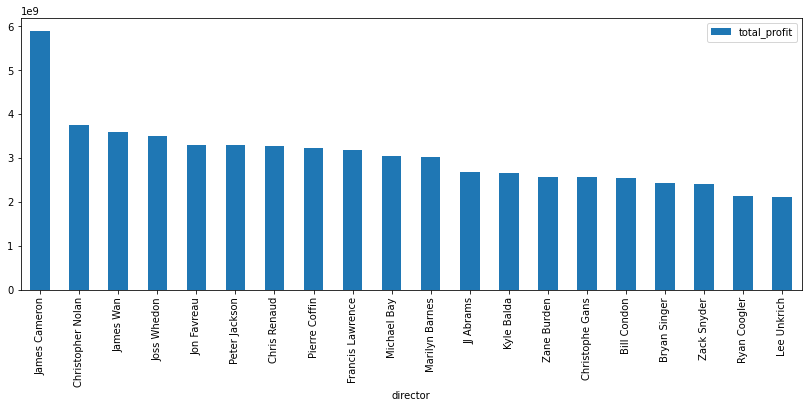

In [66]:
plt.figure()
top_directors[['director', 'total_profit']].plot(x='director', kind="bar", figsize= (14,5))
plt.savefig('images/proftByDirector.png')

### Here we have a graph of the directors whose movies have profited the most.  Next we will look at profitability by release date.  James Cameron, Peter Jackson, Christopher Nolan, and Anthony Russo top the list.  It is my recommendation that these directors be pursued first.
### We will now look at release dates to find the most profitable months to release our movie.

In [67]:
release_time = movies_df.copy(deep=False)
columns = ['primary_title','director', 'genres']
release_time.drop(columns, inplace=True, axis=1)
release_time['datetime_format'] = pd.to_datetime(release_time['datetime_format'])

In [68]:
release_time = release_time.dropna()
release_time

,datetime_format,total_profit
0,2009-12-18,3.111853e+09
5,2015-12-18,2.683973e+09
59,1997-12-19,2.667572e+09
41,2015-06-12,2.086125e+09
33,2012-05-04,1.916215e+09
...,...,...
727,2017-12-13,-9.000000e+07
728,2019-12-31,-9.000000e+07
529,2019-06-14,-1.038000e+08
271,2020-12-31,-1.500000e+08


In [69]:
release_time = release_time.reset_index(drop=False)

In [70]:
release_time['datetime_format'] = release_time['datetime_format'].dt.strftime('%m')

In [71]:
release_time

,index,datetime_format,total_profit
0,0,12,3.111853e+09
1,5,12,2.683973e+09
2,59,12,2.667572e+09
3,41,06,2.086125e+09
4,33,05,1.916215e+09
...,...,...,...
7279,727,12,-9.000000e+07
7280,728,12,-9.000000e+07
7281,529,06,-1.038000e+08
7282,271,12,-1.500000e+08


In [72]:
release_time = release_time.rename(columns={'datetime_format': 'month'})
release_time

,index,month,total_profit
0,0,12,3.111853e+09
1,5,12,2.683973e+09
2,59,12,2.667572e+09
3,41,06,2.086125e+09
4,33,05,1.916215e+09
...,...,...,...
7279,727,12,-9.000000e+07
7280,728,12,-9.000000e+07
7281,529,06,-1.038000e+08
7282,271,12,-1.500000e+08


In [73]:
release_time = release_time.groupby(['month']).sum()

In [74]:
release_time = release_time.reset_index(drop=False)

In [75]:
columns = ['index']
release_time.drop(columns, inplace=True, axis=1)
release_time

,month,total_profit
0,01,2.459670e+10
1,02,3.812298e+10
2,03,7.460614e+10
3,04,3.563098e+10
4,05,8.188809e+10
5,06,9.852036e+10
6,07,8.071301e+10
7,08,3.756485e+10
8,09,2.751669e+10
9,10,3.630194e+10


<Figure size 432x288 with 0 Axes>

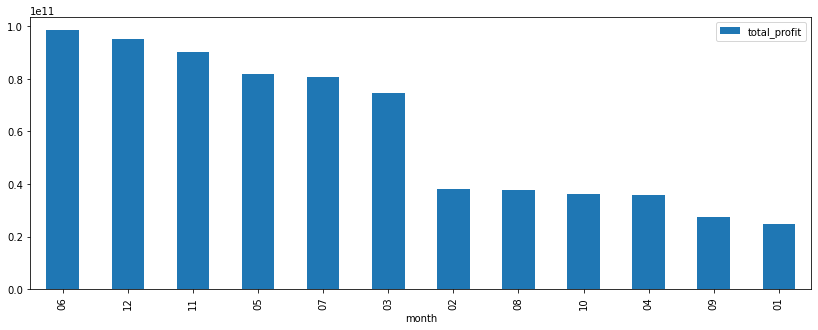

In [76]:
release_time = release_time.sort_values(by='total_profit', ascending=False)
plt.figure()
release_time[['month', 'total_profit']].plot(x='month', kind="bar", figsize= (14,5))
plt.savefig('images/ProfitByMonth')

### The ideal month to release our movie would be June, as this is peak season for movie goers.  A close second is December, primarily around Christmas break.  Third is November.  If we are not able to release the movie in June, I would recommend releasing the movie around Thanksgiving if we feel it will stay in the theaters long enough to make it to Christmas break.  Otherwise the second best option is to release in December.

### Here we will look at genres.  This will tell us what kind of movie to create.

In [77]:
genres = movies_df.copy(deep=False)
genres

,primary_title,datetime_format,total_profit,director,genres
0,Avatar,2009-12-18,3.111853e+09,James Cameron,"Action,Adventure,Sci-fi"
5,Star Wars Ep. VII: The Force Awakens,2015-12-18,2.683973e+09,JJ Abrams,"Action,Adventure,Sci-fi"
59,Titanic,1997-12-19,2.667572e+09,James Cameron,"Drama, Romance"
41,Jurassic World,2015-06-12,2.086125e+09,Colin Trevorrow,"Action,Adventure,Sci-Fi"
33,The Avengers,2012-05-04,1.916215e+09,Joss Whedon,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
151933,Det Afghanske Marerittet,NaT,NaN,Klaus Erik Okstad,Documentary
151934,Glasses,NaT,NaN,Reza Aghaei,"Drama,Family"
151935,Finding the Night of the Dead,NaT,NaN,Efrain Sosa,Documentary
151936,Les officiants,NaT,NaN,Bastien Larue,Documentary


In [78]:
columns = ['primary_title','datetime_format', 'director']
genres.drop(columns, inplace=True, axis=1)

In [79]:
genres['genres'].replace({'Action,Adventure,Sci-fi': 'Action,Adventure,Sci-Fi'}, inplace=True)
genres = genres.groupby(['genres']).sum()
genres = genres.sort_values(by='total_profit', ascending=False)
genres.head(15)

,total_profit
genres,
"Adventure,Animation,Comedy",5.235991e+10
"Action,Adventure,Sci-Fi",4.502561e+10
Drama,2.149730e+10
Documentary,1.778032e+10
"Action,Adventure,Fantasy",1.435263e+10
"Action,Adventure,Animation",1.070120e+10
"Action,Adventure,Comedy",1.055725e+10
Comedy,8.985246e+09
"Family,Fantasy,Musical",7.703107e+09


In [80]:
genres = genres.reset_index(drop=False)

In [81]:
top_genres = genres.head(20)

<Figure size 432x288 with 0 Axes>

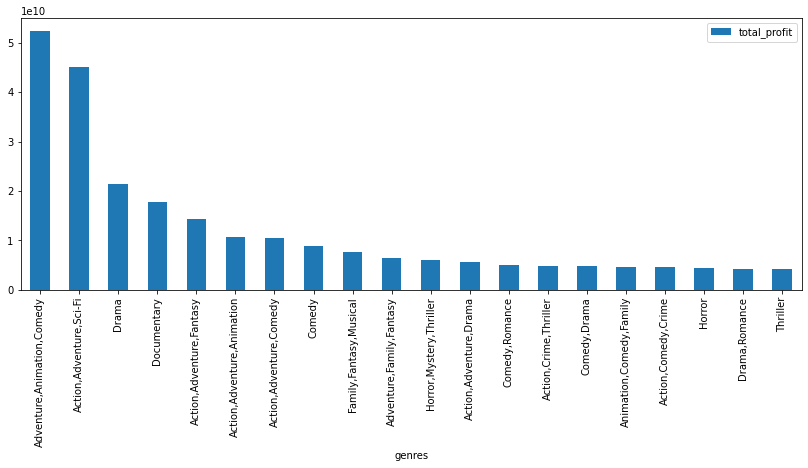

In [82]:
plt.figure()
top_genres[['genres', 'total_profit']].plot(x='genres', kind="bar", figsize= (14,5))
plt.savefig('images/ProfitByGenre.png')

### Here we see that action/adventure/animation movies are the most profitable.  Second is action/adventure/sci-fi movies, and third is drama. 
### Given the information, my recommendations are:
### -Make an Adventure/Animation/Comedy movie.
### -Have it be directed by James Cameron, Christopher Nolan, or James Wan
### -Ideally release the movie in June.